# ???

### Sabryn Bley & Thomas Benzshawel
### CSC 3310 Lab 4
### Fall 2023

## Introduction: 


## Set-Up:
The following cell imports the required libraries needed to complete the operations in this
notebook. The cell imports the time library, the copy library, the random library, the linregress
object from the scipy library, and a plt object from matplotlib. The majority of these libraries will
be used to benchmark the sorting (insertion and partial) algorithms. Additionally, they will be
used to develop the algorithms, generate test cases, create visualizations to create
comprehensive analyses from the experimental results.

In [1]:
import random
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import copy

## The Approach:

Our approach comes from a flavor of quick sort in where we do not fall into the trap of reversing a pre-sorted list. Our first step is to use our randomly selected index and split the array into right and left sub-arrays. These arrays consist of the other values in the list. Values that are less than the value at the random index are added to the left array. Items greater than are added to the right array. Then, we see if our left array is bigger than our desired k, if so, we only focus on sorting the left. This is because the k-th value is included in that array somewhere. If our left array is smaller than k, then we need to sort the right array. To find the k-th value, we do a recursive on the appropriate sub-array until the size of the left sub-array is equal to our k-th value. Once we find our k-th value, we return it.



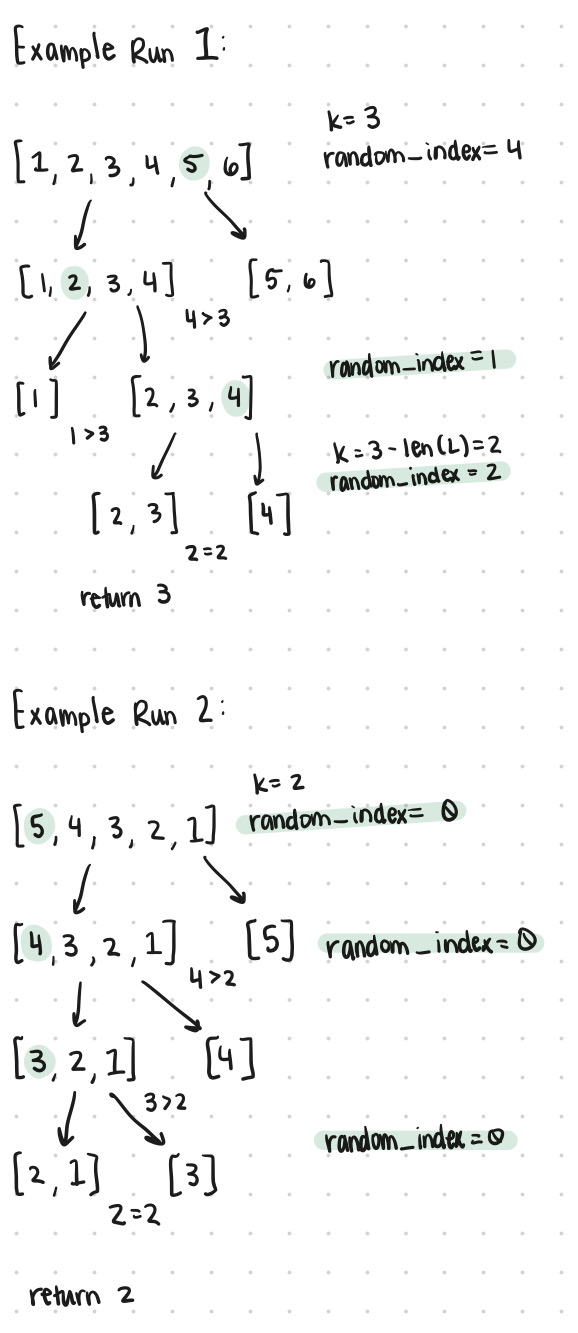


## Pseudocode:

```
def partial_sort(lst, k):
    # GET RANDOM INDEX
    index = random(0, len(lst) - 1)
    
    # ORGANIZE VALUES BY LESS THAN OR GREATER THAN/EQUAL TO VALUES
    for x in range(len(lst)):
        if lst[x] < lst[index]: # value is less than
            left.append(lst[x])
        elif lst[x] >= lst[index] and not x == index: # value is greater than but not the index
            right.append(lst[x])
    part_sorted = left + [lst[index]] + right

    # DETERMINE WHICH SIDE OF LIST NEEDS TO CONTINUE BEING SORTED
    if len(left) == (k - 1): # don't need to continue sorting
        kth_value = part_sorted[k - 1]
    elif len(left) < (k - 1): # need to sort right side
        right.insert(0, lst[index])
        kth_value = partial_sort(right, k - len(left))  # update kth_value with the result of the recursive call
    elif len(left) > (k - 1): # need to sort the left side
        left.append(lst[index])
        kth_value = partial_sort(left, k) # update kth_value with the result of the recursive call

    return kth_value
```

## Justification: 

Initialization: 

The invariant (k-th smallest value) is maintained because the entire list is included. This means that the k-th smallest value is still in the list when a random pivot index is selected. Additionally, it is still there when the other elements are organized to be on the left or right of the pivot depending on the relationship with the pivot value. This means the algorithm's invariant is able to be in the sub-array when the recursive call is made. This allows the algorithm to accurately determine the k-th value of the list.

Maintenance: The invariant is upheld throughout the algorithm by maintaining the correct placement of the k-th smallest element into sub-arrays during each step. The partitioning ensures that the random pivot divides the list into two sub-arrays, left and right, with elements less than the pivot on the left and elements greater on the right. Then, the algorithm recursively navigates one of the sub-arrays based on the size of the left sub-array. If the left side has less than the k - 1 elements, the k-th value is located within the right sub-array. If the left side has more than the k - 1 elements, the k-th value is located within the left sub-array. This partition and comparison process keeps the k-th smallest element in the sub-array that is further explored. So, the invariant is maintained by always focusing on the relevant subarray.

Termination: The algorithm terminates when the invariant correctly identifies the k-th smallest element. This termination condition arises when the left subarray contains exactly k - 1 elements, implying that the pivot value is the k-th smallest element. This is because all smaller elements are to the left. At this point, the algorithm returns the pivot value, and the invariant assures that the result is accurate. By continually reducing the search space "tighter" around the k-th element based on the relative element positions, the algorithm ensures that the desired element has been found.

## Recurrence Relation: 

T(n) = T(n/2) + n

** Assumption: The pivot splits the list in half.
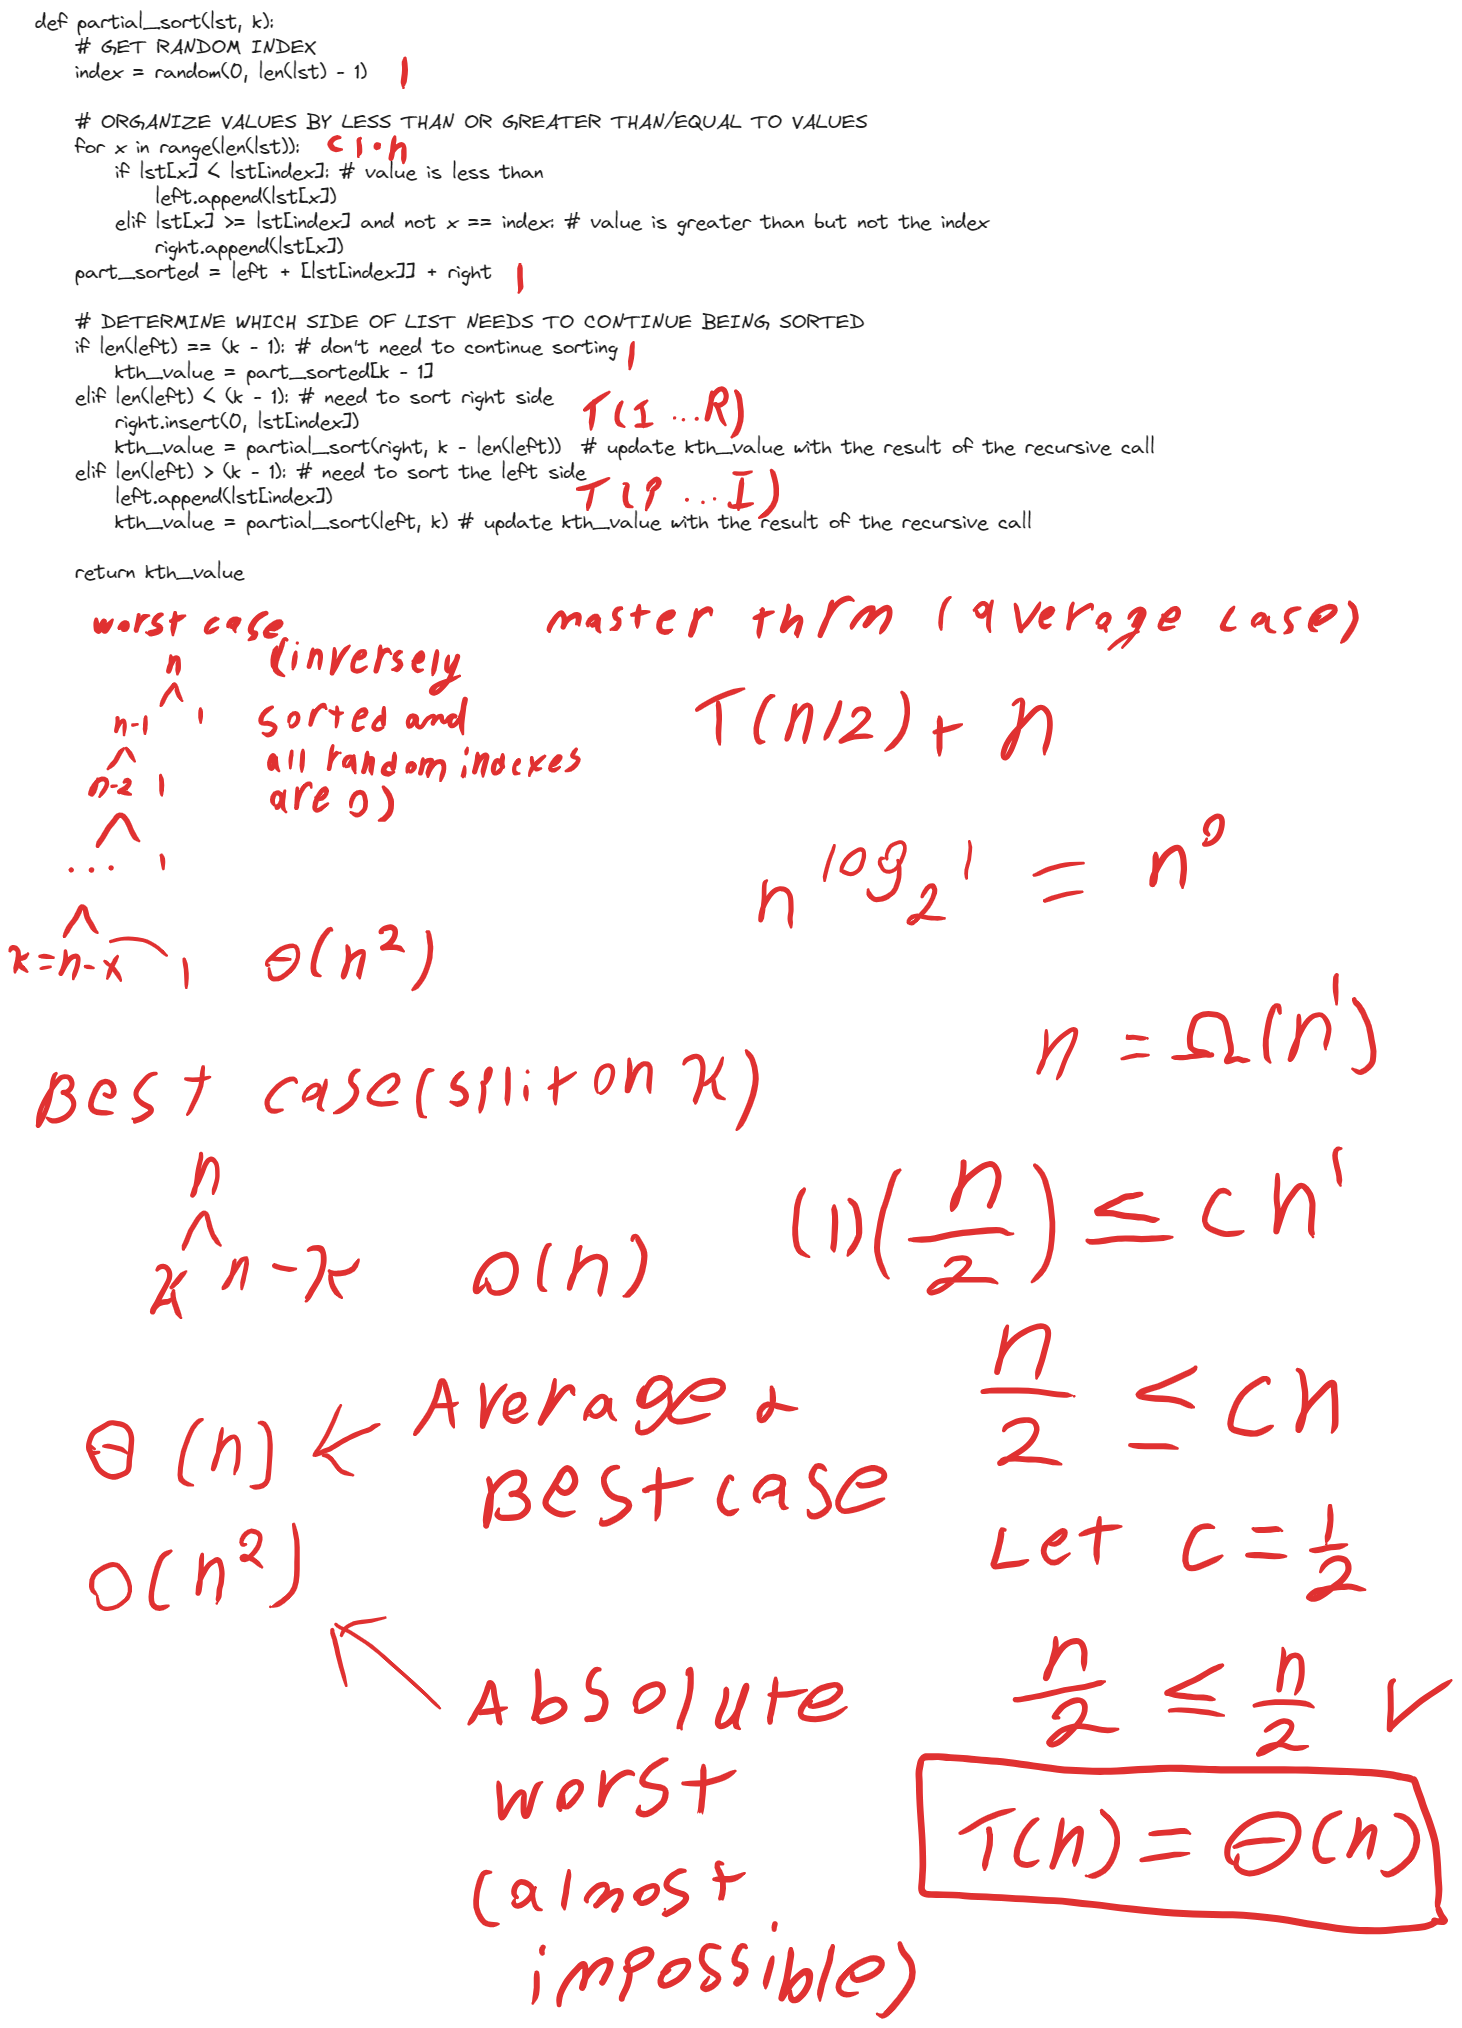

## The Code:

**Function Declarations:**

The following cell defines a helper function to create three list of values. These lists are in sorted, random, and reverse order. Additionally, they use a param n to define how many elements are in the list. The created lists are returned. This function is used to create lists for benchmarking later in the notebook.

In [2]:
def make_lists(n):
    """
    This function creates three differently sorted Python lists of length n. These lists
    are in sorted, random, and inverse order. To accomplish this the random library is used.
    
    :param n: Length of the lists
    :return: The three lists.
    """
    sorted_lst = list(range(1, n + 1)) # already sorted
    random_lst = random.sample(range(1, n + 1), n) # randomly sorted
    inverse_lst = list(range(n, 0, -1)) # inversely sorted
    return sorted_lst, random_lst, inverse_lst 

The following cell defines a helper function that benchmarks both sorting algorithms with different sized lists. The function takes in a reference to which algorithm to benchmark and the list to sort.

In [3]:
def benchmark(sorting_algorithm, input_list, k):
    """
    This function uses the time library to benchmark insertion and partial
    sort algorithms on Python lists with numericals. The function takes in
    which algorithms is being tested and the list that will be sorted. It
    then times the algorithm and returns the time as a long.

    :param sorting_algorithm: The sorting algorithm to benchmark.
    :param input_list: The list (of numericals) to benchmark.
    :param k: The k-th smallest value to find in the list.
    :return elapsed: The benchmark time for the sorting algorithm to sort 
                     the inputted list. This time is represented as a long.
    """
    if sorting_algorithm == "insert": # testing insertion sort
        # BENCHMARK
        start_time = time.perf_counter()
        insertion_sort(input_list, k)
        end_time = time.perf_counter()
    elif sorting_algorithm == "partial": # testing partial sort
        # BENCHMARK
        start_time = time.perf_counter()
        partial_sort(input_list, k)
        end_time = time.perf_counter()
    else:
        print("Error in selected method. Make sure you entered 'insert' or 'select'.")

    elapsed = end_time - start_time
    return elapsed

The following cell defines a helper function that sorts a Python list following the insertion sort algorithm. The function takes in a Python list and checks if the current element is smaller than the previous. It repeats this until the current element is no longer smaller, effectively sorting all elements left of the current element. It then repeats this process for all remaining elements in the list, resulting in a completely sorted list.

In [4]:
def insertion_sort(lst, k):
    """
    This function uses the insertion-sort algorithm to sort a Python list
    (of numerical values.) This function does this by comparing the key 
    value to the already sorted values (the invariant located left to the 
    key). This compares the key to the invariant values until the key is no 
    longer smaller and inserts the key to that location in the list. It 
    repeats this process for each element in the list (where the key starts 
    at the second element). This creates a sorted list without creating a 
    new/additional list. It then selects and returns the kth smallest value
    in the list.
    
    :param lst: The Python list to be sorted
    :param k: The k-th smallest value to find in the list.
    :return : The k-th smallest value.
    """
    for j in range(1, len(lst)):
        key = lst[j]

        i = j - 1
        while i > -1 and lst[i] > key:
            lst[i + 1] = lst[i]
            i = i - 1

        lst[i + 1] = key
    
    return lst[k - 1]

The following cell defines a helper function that sorts a Python list following the partial sort algorithm. It selects a random index, and compares the remaining elements to the value at the index. If the value is less than, then it is put to the left of the index. If the value is greater than, then it is put to the right of the index. Then, it compares if it needs to continue sorting the left or the right side depending on the k value. Once it doesn't need to keep sorting a side, the value is returned as the kth smallest value.

In [5]:
def partial_sort(lst, k):
    """
    This function uses the partial-sort algorithm to sort a Python list
    (of numerical values.) It selects a random index, and compares the remaining
    elements to the value at the index. If the value is less than, then 
    it is put to the left of the index. If the value is greater than, then
    it is put to the right of the index. Then, it compares if it needs to 
    continue sorting the left or the right side depending on the k value. 

    :param lst: The Python list to be sorted
    :param k: The k-th smallest value to find in the list.
    :return : The k-th smallest value.
    """
    # CREATE KTH VALUE VARIABLE
    kth_value = None
    
    # GET RANDOM INDEX FROM LIST
    index = random.randint(0, len(lst) - 1)

    # SORT REST OF LIST AROUND INDEX
    left = list()
    right = list()

    for x in range(len(lst)):
        if lst[x] < lst[index]:
            left.append(lst[x])
        elif lst[x] >= lst[index] and not x == index:
            right.append(lst[x])

    part_sorted = left + [lst[index]] + right

    # DETERMINE WHICH SIDE OF LIST NEEDS TO CONTINUE BEING SORTED
    if len(left) == (k - 1): # don't need to continue sorting
        kth_value = part_sorted[k - 1]

    elif len(left) < (k - 1): # need to sort right side
        right.insert(0, lst[index])
        kth_value = partial_sort(right, k - len(left))  # Update kth_value with the result of the recursive call
    elif len(left) > (k - 1): # need to sort the left side
        left.append(lst[index])
        kth_value = partial_sort(left, k)

    return kth_value

**Algorithm Function Testing:**

Test 1 assures that the algorithms can select the 2nd smallest item from a sorted list. It should result the value at index 1 being returned.

In [6]:
# DEFINE SORTED LIST (TEST)
test_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("List Before Methods: ", test_1)

# DEFINE THE K-TH SMALLEST NUMBER BEING SEARCHED FOR
k = random.randint(1, 10)
print("K-Value: ", k)

# CREATE COPIES FOR BOTH TESTS
test_1_insert = copy.deepcopy(test_1) # create a new list for the insertion sort method
test_1_partial = copy.deepcopy(test_1) # create a new list for the partial sort method

# RUN AND PRINT RESULTS AFTER METHODS APPLIED
print("Kth Value From Insertion Sort Method: ", insertion_sort(test_1_insert, k))
print("Kth Value From Partial Sort Method: ", partial_sort(test_1_partial, k))

List Before Methods:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
K-Value:  5
Kth Value From Insertion Sort Method:  5
Kth Value From Partial Sort Method:  5


Test 2 assures that the algorithms can select the 2nd smallest item from a randomly sorted list. 

In [7]:
# DEFINE RANDOMLY SORTED LIST (TEST)
test_2 = random.sample(range(1, 11), 10)
print("List Before Methods: ", test_2)

# DEFINE THE K-TH SMALLEST NUMBER BEING SEARCHED FOR
k = random.randint(1, 10)
print("K-Value: ", k)

# CREATE COPIES FOR BOTH TESTS
test_2_insert = copy.deepcopy(test_2) # create a new list for the insertion sort method
test_2_partial = copy.deepcopy(test_2) # create a new list for the partial sort method

# RUN AND PRINT RESULTS AFTER METHODS APPLIED
print("Kth Value From Insertion Sort Method: ", insertion_sort(test_2_insert, k))
print("Kth Value From Partial Sort Method: ", partial_sort(test_2_partial, k))

List Before Methods:  [5, 1, 4, 9, 6, 3, 10, 7, 8, 2]
K-Value:  10
Kth Value From Insertion Sort Method:  10
Kth Value From Partial Sort Method:  10


Test 3 assures that the algorithms can select the 2nd smallest item from an inversely sorted list. 

In [8]:
# DEFINE INVERSELY SORTED LIST (TEST)
test_3 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
print("List Before Methods: ", test_3)

# DEFINE THE K-TH SMALLEST NUMBER BEING SEARCHED FOR
k = random.randint(1, 10)
print("K-Value: ", k)

# CREATE COPIES FOR BOTH TESTS
test_3_insert = copy.deepcopy(test_3) # create a new list for the insertion sort method
test_3_partial = copy.deepcopy(test_3) # create a new list for the partial sort method

# RUN AND PRINT RESULTS AFTER METHODS APPLIED
print("Kth Value From Insertion Sort Method: ", insertion_sort(test_3_insert, k))
print("Kth Value From Partial Sort Method: ", partial_sort(test_3_partial, k))

List Before Methods:  [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
K-Value:  2
Kth Value From Insertion Sort Method:  2
Kth Value From Partial Sort Method:  2


### Benchmarks: 

The following cell creates Python lists of various lengths and differing sorting methods. The sorting methods represent the best, average, and worst case for both insertion and partial sort methods. These lists will be used to create copies for each benchmark.

### NOTE

Our benchmarking was limited by computational power due to running insertion sort for comparison reasons. This signifantly changes our estimated runtimes, so keep that in mind as you analyze our figures. 

In [9]:
# LISTS OF LENGTH 10
best_case_10, average_case_10, worst_case_10 = make_lists(10)

# LISTS OF LENGTH 100
best_case_100, average_case_100, worst_case_100 = make_lists(100)

# LISTS OF LENGTH 1,000
best_case_1000, average_case_1000, worst_case_1000 = make_lists(1000)

# LISTS OF LENGTH 10,000
best_case_10000, average_case_10000, worst_case_10000 = make_lists(10000)

# LISTS OF LENGTH 100,000
best_case_100000, average_case_100000, worst_case_100000 = make_lists(100000)

The following cell creates a k-value. This will be copied for benchmarking the algorithms. 

In [10]:
k = random.randint(1, 10)
print("K-Value: ", k)

K-Value:  10


**Best Case (List is Sorted):**

The following cell benchmarks the insertion sort method with the varying list lengths of the best case (a sorted list.) These values are stored in a Python list.

In [11]:
# CREATE LIST TO STORE INSERTION BEST CASE BENCHMARKS
insert_best = list()

# RUN & ADD INSERTION BEST CASE BENCHMARKS
insert_best.append(benchmark("insert", copy.deepcopy(best_case_10), k)) # n = 10
insert_best.append(benchmark("insert", copy.deepcopy(best_case_100), k)) # n = 100
insert_best.append(benchmark("insert", copy.deepcopy(best_case_1000), k)) # n = 1,000
insert_best.append(benchmark("insert", copy.deepcopy(best_case_10000), k)) # n = 10,000
insert_best.append(benchmark("insert", copy.deepcopy(best_case_100000), k)) # n = 100,000

print("Insertion Sort Best Case: ", insert_best)

Insertion Sort Best Case:  [4.799978341907263e-06, 9.099981980398297e-06, 9.819999104365706e-05, 0.0010100000072270632, 0.008657900005346164]


The following cell benchmarks the partial sort methods with the varying list lengths of the best case (a sorted list.) These values are stored in a Python list.

In [12]:
# CREATE LIST TO STORE partial BEST CASE BENCHMARKS
partial_best = list()

# RUN & ADD PARTIAL BEST CASE BENCHMARKS
partial_best.append(benchmark("partial", copy.deepcopy(best_case_10), k)) # n = 10
partial_best.append(benchmark("partial", copy.deepcopy(best_case_100), k)) # n = 100
partial_best.append(benchmark("partial", copy.deepcopy(best_case_1000), k)) # n = 1,000
partial_best.append(benchmark("partial", copy.deepcopy(best_case_10000), k)) # n = 10,000
partial_best.append(benchmark("partial", copy.deepcopy(best_case_100000), k)) # n = 100,000

print("Partial Sort Best Case: ", partial_best)

Partial Sort Best Case:  [1.5999976312741637e-05, 3.9700011257082224e-05, 0.00023380000493489206, 0.0013638999953400344, 0.01290329999756068]


**Average Case (List is Randomly Sorted):**

The following cell benchmarks the insertion sort method with the varying list lengths of the average case (a randomly sorted list.) These values are stored in a Python list.

In [13]:
# CREATE LIST TO STORE INSERTION BEST CASE BENCHMARKS
insert_ave = list()

# RUN & ADD INSERTION BEST CASE BENCHMARKS
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_10), k)) # n = 10
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_100), k)) # n = 100
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_1000), k)) # n = 1,000
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_10000), k)) # n = 10,000
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_100000), k)) # n = 100,000

print("Insertion Sort Average Case: ", insert_ave)

Insertion Sort Average Case:  [4.9000082071870565e-06, 0.00013249999028630555, 0.015336799988290295, 1.6214570000011008, 302.7518407999887]


The following cell benchmarks the partial sort method with the varying list lengths of the average case (a randomly sorted list.) These values are stored in a Python list.

In [14]:
# CREATE LIST TO STORE PARTIAL BEST CASE BENCHMARKS
partial_ave = list()

# RUN & ADD INSERTION BEST CASE BENCHMARKS
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_10), k)) # n = 10
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_100), k)) # n = 100
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_1000), k)) # n = 1,000
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_10000), k)) # n = 10,000
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_100000), k)) # n = 100,000

print("Partial Sort Average Case: ", partial_ave)

Partial Sort Average Case:  [2.929999027401209e-05, 7.180002285167575e-05, 0.00039679999463260174, 0.0030915999959688634, 0.020981999987270683]


**Worst Case (List is Inversely Sorted):**

The following cell benchmarks the insertion sort method with the varying list lengths of the worst case (an inversely sorted list.) These values are stored in a Python list.

In [15]:
# CREATE LIST TO STORE INSERTION BEST CASE BENCHMARKS
insert_worst = list()

# RUN & ADD INSERTION BEST CASE BENCHMARKS
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_10), k)) # n = 10
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_100), k)) # n = 100
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_1000), k)) # n = 1,000
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_10000), k)) # n = 10,000
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_100000), k)) # n = 100,000

print("Insertion Sort Average Case: ", insert_worst)

Insertion Sort Average Case:  [1.0099989594891667e-05, 0.0011640999873634428, 0.054562500008614734, 6.752135099988664, 620.7107252000133]


The following cell benchmarks the partial sort method with the varying list lengths of the worst case (an inversely sorted list.) These values are stored in a Python list.

In [16]:
# CREATE LIST TO STORE PARTIAL BEST CASE BENCHMARKS
partial_worst = list()

# RUN & ADD PARTIAL BEST CASE BENCHMARKS
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_10), k)) # n = 10
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_100), k)) # n = 100
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_1000), k)) # n = 1,000
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_10000), k)) # n = 10,000
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_100000), k)) # n = 100,000

print("Partial Sort Average Case: ", partial_worst)

Partial Sort Average Case:  [2.720000338740647e-05, 4.120002267882228e-05, 0.00031430000672116876, 0.0015543999907094985, 0.022176300000865012]


### Analysis:

The following cell defines a Python list for the different list sizes used during benchmarking.

In [17]:
# DEFINE THE DIFFERENT LIST SIZES
list_sizes = [10, 100, 1000, 10000, 100000]

**Calculating Run Times:**

The following cell calculates the slope for the insertion and partial sort run times for the best, average, and worst cases. This is done using the numpy library and linregress object from the scipy.stats library.

In [18]:
# CALCULATE THE INSERTION SORT SLOPE FOR EACH CASE
insert_best_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(insert_best))
insert_ave_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(insert_ave))
insert_worst_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(insert_worst))

# CALCULATE THE PARTIAL SORT SLOPE FOR EACH CASE
partial_best_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(partial_best))
partial_ave_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(partial_ave))
partial_worst_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(partial_worst))

# PRINT RESULTS
print("Insertion Best Case: ", insert_best_slope)
print("Insertion Average Case: ", insert_ave_slope)
print("Insertion Worst Case: ", insert_worst_slope)
print("Partial Best Case: ", partial_best_slope)
print("Partial Average Case: ", partial_ave_slope)
print("Partial Worst Case: ", partial_worst_slope)

Insertion Best Case:  0.8557627420189868
Insertion Average Case:  1.9669469559494157
Insertion Worst Case:  1.9340587485186884
Partial Best Case:  0.7349154807779277
Partial Average Case:  0.7344017528069475
Partial Worst Case:  0.7399305589872343


**Visualizations:**

The following cell creates a line graph to visualize the runtimes for the best case for the insertion and partial sort methods on varying list sizes. This is done using the matplotlib library.

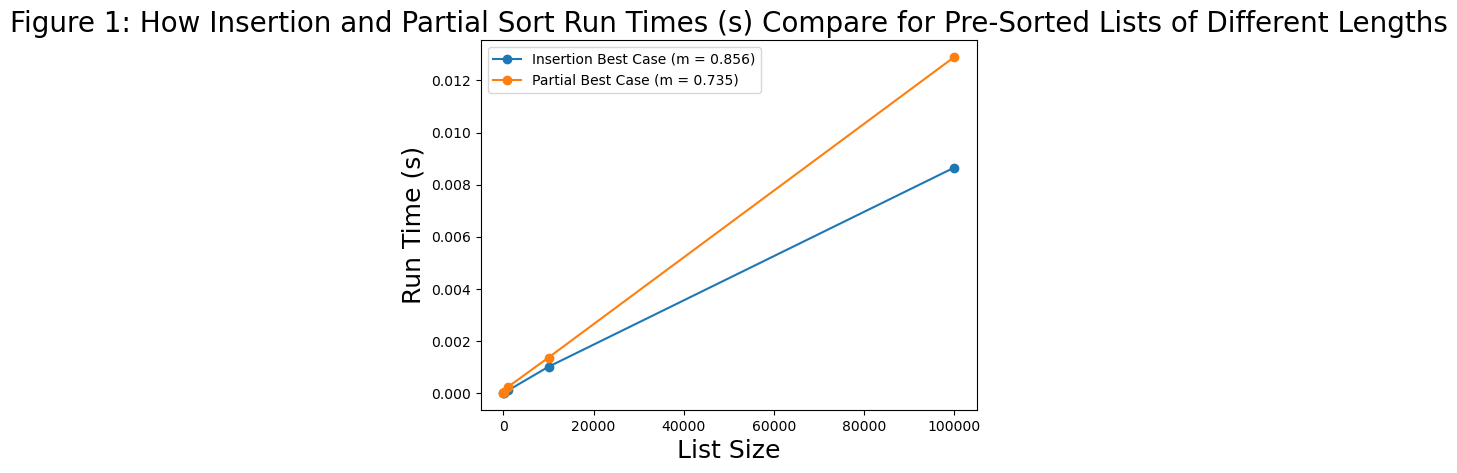

In [20]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# # INCREASE PLOT SIZE
# plt.figure(figuresize = (30, 15))

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, insert_best, label = ('Insertion Best Case (m = ' + "{:.3f}".format(insert_best_slope) + ')'), marker = 'o', linestyle = '-')
ax.plot(list_sizes, partial_best, label = ('Partial Best Case (m = ' + "{:.3f}".format(partial_best_slope) + ')'), marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 1: How Insertion and Partial Sort Run Times (s) Compare for Pre-Sorted Lists of Different Lengths', fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

The following cell creates a line graph to visualize the runtimes for the average case for the insertion and partial sort methods on varying list sizes. This is done using the matplotlib library.

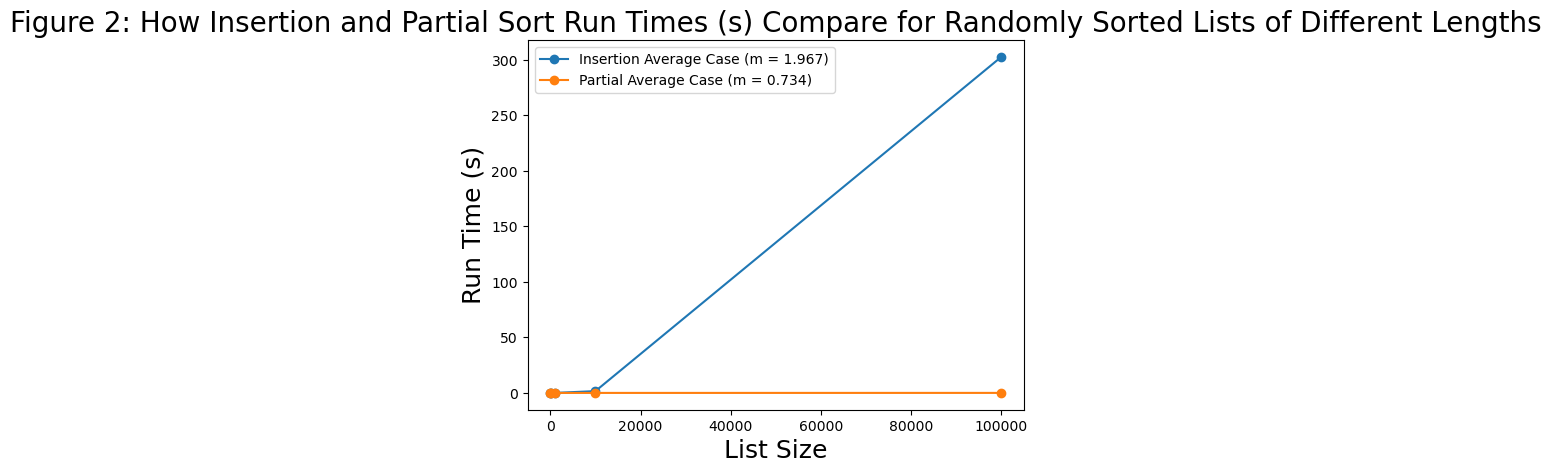

In [21]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# # INCREASE PLOT SIZE
# plt.figure(figuresize = (30, 15))

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, insert_ave, label = ('Insertion Average Case (m = ' + "{:.3f}".format(insert_ave_slope) + ')'), marker = 'o', linestyle = '-')
ax.plot(list_sizes, partial_ave, label = ('Partial Average Case (m = ' + "{:.3f}".format(partial_ave_slope) + ')'), marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 2: How Insertion and Partial Sort Run Times (s) Compare for Randomly Sorted Lists of Different Lengths', fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

The following cell creates a line graph to visualize the runtimes for the worst case for the insertion and partial sort methods on varying list sizes. This is done using the matplotlib library.

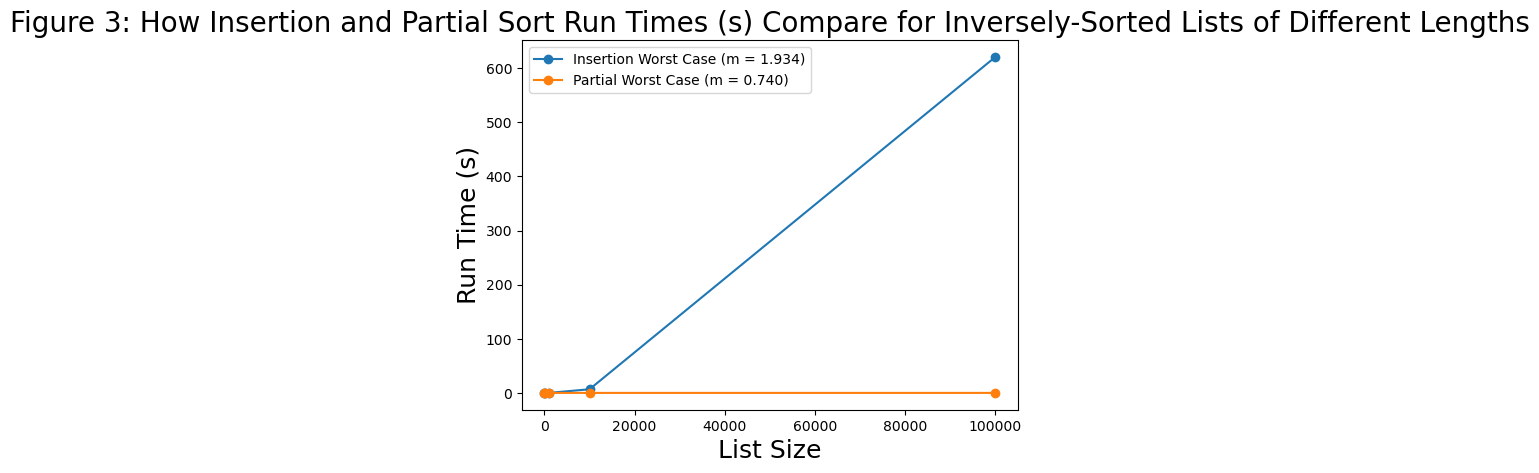

In [22]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# # INCREASE PLOT SIZE
# plt.figure(figuresize = (30, 15))

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, insert_worst, label = ('Insertion Worst Case (m = ' + "{:.3f}".format(insert_worst_slope) + ')'), marker = 'o', linestyle = '-')
ax.plot(list_sizes, partial_worst, label = ('Partial Worst Case (m = ' + "{:.3f}".format(partial_worst_slope) + ')'), marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 3: How Insertion and Partial Sort Run Times (s) Compare for Inversely-Sorted Lists of Different Lengths', fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

**Comparison Table:**

Using the slope to run time conversion table provided in the lab 1 manual, it is possible to analyze the run time functions for each algorithm for each case.

#### Table 1: The Theoretical & Estimated Run Time Functions for Insertion and Partial Sort Algorithms for each case
| Algorithm | Test Case | Slope (m) | Theoretical Run Time Functions | Estimated Run Time Functions |
|-----------|-----------|-----------|--------------------------------|------------------------------|
| Insertion | Best      | $0.856$   | $O(n)$                         | $O(log n)$                   |                     
| Insertion | Average   | $1.967$   | $O(n^2)$                       | $O(n log n)$                 | 
| Insertion | Worst     | $1.934$   | $O(n^2)$                       | $O(n log n)$                 |                    
| Partial   | Best      | $0.735$   | $O(n)$                         | $O(log n)$                   |                     
| Partial   | Average   | $0.734$   | $O(n)$                         | $O(log n)$                   |                    
| Partial   | Worst     | $0.740$   | $O(n^2)$                       | $O(log n)$                   |                     

** Theoretical run time estimations for partial sort assume that the random index approximately splits the list in half.

### Conclusion: 
Determining the k-th smallest value in a dataset is inefficient to do by hand in real-world applications. So, it is important to develop an algorithm to determine it computationally. However, sorting the entire dataset becomes expensive and inefficient with large datasets. So, an algorithm that doesn't require sorting the whole dataset is vital. In this notebook, we defined an algorithm for determining the k-th smallest value in a dataset, provided justification, solved the recurrence relation, benchmarked, and analyzed the run times for different sized datasets. To complete these tasks, the notebook uses the functionality of time, random, matplotlib, scipy, numpy, and shapely libraries.

After completing this notebook, we determined that the algorithm runs faster than $O(n log n)$ because it minimizes how much of the list needs to be sorted. However, it is dependent on the randomly selected index evenly splitting the list. Without this assumption, the run time would be higher.